In [16]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

from scipy.constants import physical_constants
mc2 = physical_constants['electron mass energy equivalent in MeV'][0]*1e6  # m_e c^2 in [eV] 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from distgen.generator import Generator
from gpt import GPT
from gpt.gpt_distgen import run_gpt_with_distgen

from pmd_beamphysics import single_particle

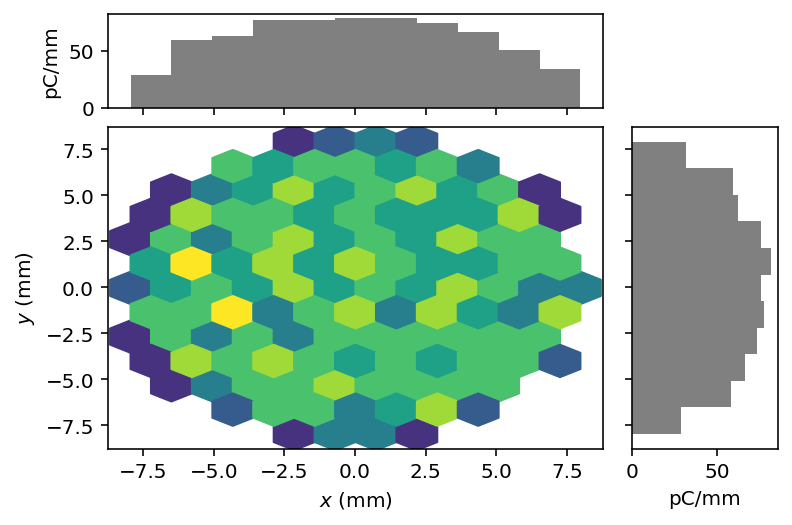

In [4]:
gen = Generator('templates/cu_injector/distgen.in.yaml')
gen['n_particle']=500
gen.run()
gen.particles.plot('x', 'y')
pg = gen.particles

In [19]:
centroid = single_particle(x =pg['mean_x'], y =pg['mean_y'],  z=pg['mean_z'],
                           px=pg['mean_x'], py=pg['mean_y'], pz=pg['mean_pz'], t = pg['mean_t'])

centroid['p']/mc2 - 0.00043286905408703526

#0.00043286905408703526

array([1.08420217e-19])

In [7]:
settings={
          'Ntout':500,
          'gun_voltage':400,
          'buncher_voltage':50,
          'phiCTB01_off':-90, 
          'cavity_1_voltage':1000,
          'cavity_2_voltage':1000,
          'cavity_3_voltage':1000,
          'cavity_4_voltage':1000,
          'cavity_5_voltage':1000,
          'A3Quad_1_current':3,
          'A3Quad_2_current':-3,
          'A3Quad_3_current':3
         }

In [8]:
G = GPT('templates/cu_injector/gpt.in', initial_particles=centroid, verbose=True)
G.set_variables(settings);

Could no parse: Map2D_B("wcs", XSLA01,YSLA01,ZSLA01,  cos(THXSLA01),0,sin(THXSLA01), 0,1,0, "fields/solenoid_SLA_L60.gdf", "R", "Z", "Br", "Bz", BSLA01);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC02, 1,0,0, 0,-1,0, "fields/icm_1d.gdf", "z", "Ez", -ECTC02, phiCTC02, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC03, 1,0,0, 0,1,0, "fields/icm_1d.gdf", "z", "Ez", ECTC03, phiCTC03, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC04, 1,0,0, 0,-1,0, "fields/icm_1d.gdf", "z", "Ez", -ECTC04, phiCTC04, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map1D_TM("wcs", 0, 0, ZCTC05, 1,0,0, 0,1,0, "fields/icm_1d.gdf", "z", "Ez", ECTC05, phiCTC05, 2*pi*Master_RF);
Could not parse z-position for mline
Could no parse: Map25D_TM("wcs",   XMLC01, 0,  ZMLC01,   nz_MLC, 0, -nx_MLC, 0, 1, 0, "fields/mlc_scott_2D.gdf",  "r", "z", "Er", "Ez", "Bphi", MLC_f

In [9]:
G.auto_phase()


Auto Phasing >------

****> Creating intiial distribution for phasing...
writing 1 particles to /var/folders/ry/l_d12g5s69n2r0nvb1xy0hhm0000gn/T/tmp11i19spd/gpt_particles.phasing.gdf
<**** Created intiial distribution for phasing.

   Writing gpt input file to "/var/folders/ry/l_d12g5s69n2r0nvb1xy0hhm0000gn/T/tmp11i19spd/gpt.in"

Phasing: /var/folders/ry/l_d12g5s69n2r0nvb1xy0hhm0000gn/T/tmp11i19spd/gpt.in
 
Cavity 0: Bracketed between 120 and 160
Cavity 0: Best phase = 133.47767840088906, final gamma = 1.784646802
 
Cavity 1: Bracketed between 20 and 60
Cavity 1: Best phase = 50.33330047103829, final gamma = 3.490920988
 
Cavity 2: Bracketed between 0 and 40
Cavity 2: Best phase = 23.976470376724894, final gamma = 5.382996881
 
Cavity 3: Bracketed between 260 and 300
Cavity 3: Best phase = 272.22600280583003, final gamma = 7.311859593
 
Cavity 4: Bracketed between 280 and 320
Cavity 4: Best phase = 293.27148704354624, final gamma = 9.25407168
 
Cavity 5: Bracketed between 180 and 220


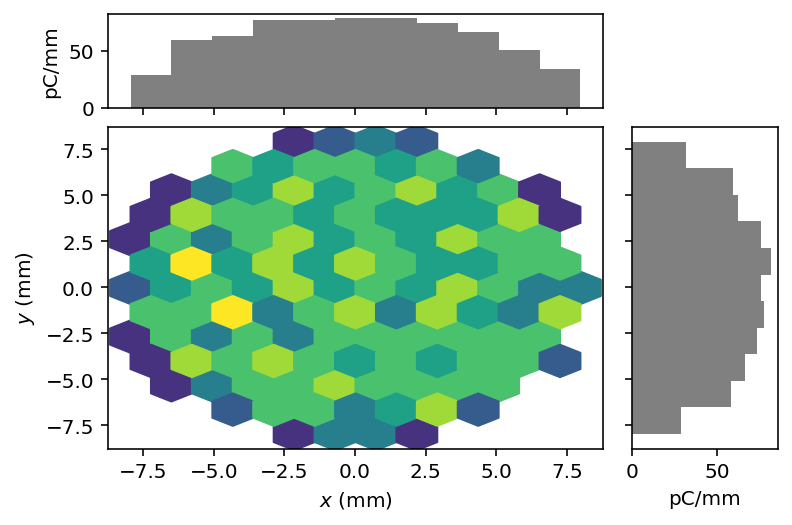

In [10]:
# Down sample particles for speed
gen['n_particle']=500
gen.run()
gen.particles.plot('x', 'y')
G.initial_particles = gen.particles

In [11]:
G.run()

GPT.run_gpt:
   Initial 500 particles written to "/var/folders/ry/l_d12g5s69n2r0nvb1xy0hhm0000gn/T/tmp11i19spd/gpt.particles.gdf"
   Running GPT...
   Writing gpt input file to "/var/folders/ry/l_d12g5s69n2r0nvb1xy0hhm0000gn/T/tmp11i19spd/gpt.in"
   Running with timeout = None sec.
   Loading GPT data from /var/folders/ry/l_d12g5s69n2r0nvb1xy0hhm0000gn/T/tmp11i19spd/gpt.out.gdf
   GDF data loaded, time ellapsed: 0.235288 (sec).
   Converting tout and screen data to ParticleGroup(s)
   Run finished, total time ellapsed: 14.6333 (sec)


In [12]:
settings['n_particle']=500

G2 = run_gpt_with_distgen(settings,
                          gpt_input_file='templates/cu_injector/gpt.in',
                          distgen_input_file='templates/cu_injector/distgen.in.yaml',
                          verbose=True,
                          auto_phase=True,)
                          #workdir='templates/cu_injector/temp',
                          #use_tempdir=False)

Run GPT with Distgen:
Ntout is in gpt
gun_voltage is in gpt
buncher_voltage is in gpt
phiCTB01_off is in gpt
cavity_1_voltage is in gpt
cavity_2_voltage is in gpt
cavity_3_voltage is in gpt
cavity_4_voltage is in gpt
cavity_5_voltage is in gpt
A3Quad_1_current is in gpt
A3Quad_2_current is in gpt
A3Quad_3_current is in gpt
Replacing param n_particle with value 500
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/ry/l_d12g5s69n2r0nvb1xy0hhm0000gn/T/tmp1gso1wxo/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 500.
   Assuming cylindrical symmetry...
   r distribution: SuperGaussianRad
      lambda = 5.65685 mm, power = INF
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: Super Gaussian
      sigma_t = 2

-0.0006727706572385551

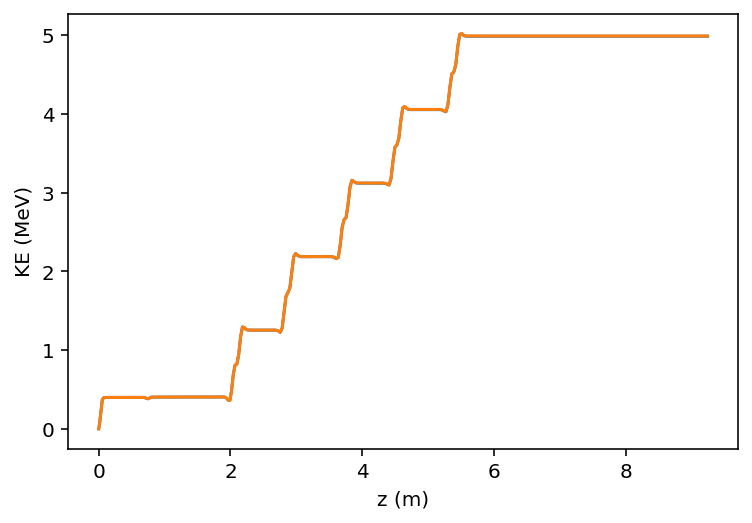

In [27]:
plt.plot(G.tout_stat('mean_z')[:-10], G.tout_stat('mean_kinetic_energy')[:-10]/1e6);
plt.plot(G2.tout_stat('mean_z')[:-10], G2.tout_stat('mean_kinetic_energy')[:-10]/1e6);
plt.xlabel('z (m)');
plt.ylabel('KE (MeV)');

(G.tout_stat('mean_kinetic_energy')[-10] - G2.tout_stat('mean_kinetic_energy')[-10])/G2.tout_stat('mean_kinetic_energy')[-10]

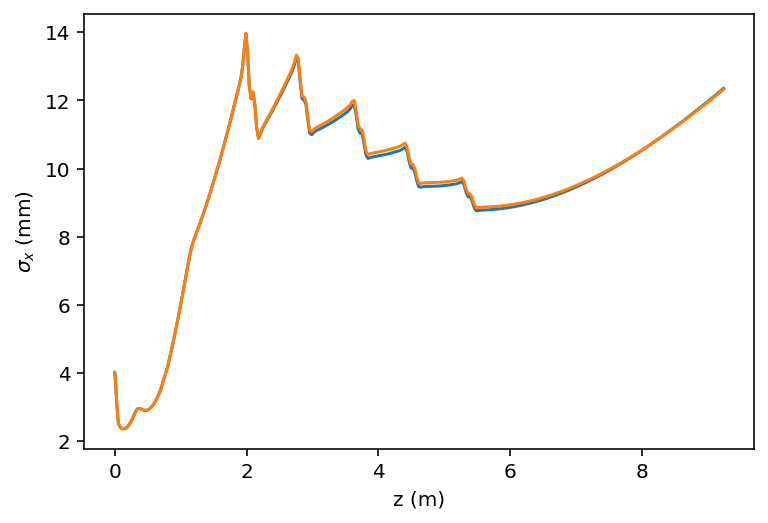

In [21]:
plt.plot(G.tout_stat('mean_z')[:-10], G.tout_stat('sigma_x')[:-10]*1e3);
plt.plot(G2.tout_stat('mean_z')[:-10], G2.tout_stat('sigma_x')[:-10]*1e3);
plt.xlabel('z (m)');
plt.ylabel('$\sigma_x$ (mm)');

In [22]:
phases = ['phiCTB01_0', 'phiCTC01_0', 'phiCTC02_0', 'phiCTC03_0', 'phiCTC04_0', 'phiCTC05_0']

for p in phases:
    print(G.input['variables'][p] - G2.input['variables'][p])


0.0
0.3180949626590035
0.23117726336219846
0.10521968807421445
0.01468635300312826
-0.24005696237583152


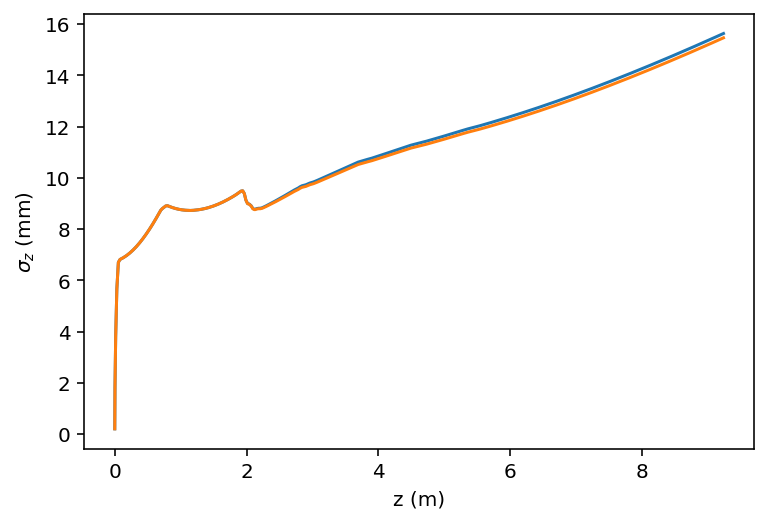

In [23]:
plt.plot(G.tout_stat('mean_z')[:-10], G.tout_stat('sigma_z')[:-10]*1e3);
plt.plot(G2.tout_stat('mean_z')[:-10], G2.tout_stat('sigma_z')[:-10]*1e3);
plt.xlabel('z (m)');
plt.ylabel('$\sigma_z$ (mm)');